# 공식 변수값 구하기

1) BL(긴변)과 BS(짧은변) 구하기

2) 

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from haversine import *

# 1) BL, BS 구하기

In [7]:
data = gpd.read_file("../data/buildings/building_samples_sep.shp",encoding="euc-kr")
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 44 columns):
index         1072 non-null int64
BDTYP_CD      1072 non-null object
BD_MGT_SN     1072 non-null object
BSI_INT_SN    1072 non-null float64
BSI_ZON_NO    1072 non-null object
BULD_MNNM     1072 non-null int64
BULD_NM       957 non-null object
BULD_NM_DC    936 non-null object
BULD_SE_CD    1072 non-null object
BULD_SLNO     1072 non-null int64
BUL_DPN_SE    1072 non-null object
BUL_MAN_NO    1072 non-null int64
EMD_CD        1072 non-null object
GRO_FLO_CO    1072 non-null int64
LI_CD         1072 non-null object
LNBR_MNNM     1072 non-null int64
LNBR_SLNO     1072 non-null int64
MNTN_YN       1072 non-null object
RN_CD         1072 non-null object
SIG_CD        1072 non-null object
UND_FLO_CO    1072 non-null int64
ZIP           0 non-null object
X_AXIS        1072 non-null int64
Y_AXIS        1072 non-null int64
HOUS_ID       1072 non-null object
TOTAL_AREA    1072 non-n

In [8]:
# 필요한 정보 1차 거르기
bld = data.loc[:,["BD_MGT_SN","BULD_NM","lat_center","lon_center",
                  "lat_max","lon_max","lat_min","lon_min"]]
bld.rename(columns={"BD_MGT_SN":"빌딩코드","BULD_NM":"빌딩명"},inplace=True)
bld

,빌딩코드,빌딩명,lat_center,lon_center,lat_max,lon_max,lat_min,lon_min
0,1114011400101500000022693,삼성생명빌딩,37.561616,126.974975,37.561904,126.975371,37.561363,126.974545
1,1114016600101110000000001,태평로빌딩,37.562967,126.975960,37.563157,126.976186,37.562769,126.975733
2,1114011400100430000023455,한화금융센터_태평로,37.564229,126.977566,37.564518,126.977849,37.563941,126.977317
3,1114011800105410000021354,서울스퀘어,37.555507,126.973755,37.556020,126.974185,37.555038,126.973337
4,1114011800105810000021764,서울시티타워,37.554299,126.974050,37.554579,126.974367,37.554065,126.973756
...,...,...,...,...,...,...,...,...
1067,1150010300110250033029431,None,37.546525,126.838974,37.546687,126.839177,37.546372,126.838770
1068,1156011200101640000029240,현대아파트,37.524027,126.894861,37.524117,126.895098,37.523928,126.894623
1069,1141011800104600000012964,홍은동풍림아이원아파트,37.603899,126.947318,37.604034,126.947510,37.603755,126.947125
1070,1171010100100400000026810,갤러리아팰리스,37.511423,127.093528,37.511638,127.094150,37.511135,127.093019


In [11]:
# 네 점의 좌표쌍 구하기
x_pair_1 = (bld.loc[0,"lat_max"],bld.loc[0,"lon_min"])
x_pair_2 = (bld.loc[0,"lat_max"],bld.loc[0,"lon_max"])
y_pair_1 = (bld.loc[0,"lat_max"],bld.loc[0,"lon_max"])
y_pair_2 = (bld.loc[0,"lat_min"],bld.loc[0,"lon_max"])

# x값들의 차, y값들의 차 각각 구하기
x_val = haversine(x_pair_1,x_pair_2)
y_val = haversine(y_pair_1,y_pair_2)

# 확인
print(x_val,y_val)

0.07281143466910986 0.06013132059752156


In [12]:
# x,y값들의 차 판별하여 더 긴변과 짧은변 판별하여 리스트에 저장하기
B_long = []
B_short = []
for i in range(0,len(bld.lat_max)) :
    x_pair_1 = (bld.loc[i,"lat_max"],bld.loc[i,"lon_min"])
    x_pair_2 = (bld.loc[i,"lat_max"],bld.loc[i,"lon_max"])
    y_pair_1 = (bld.loc[i,"lat_max"],bld.loc[i,"lon_max"])
    y_pair_2 = (bld.loc[i,"lat_min"],bld.loc[i,"lon_max"])
    x = haversine(x_pair_1,x_pair_2)
    y = haversine(y_pair_1,y_pair_2)
    if x > y :
        B_long.append(x)
        B_short.append(y)
    else :
        B_long.append(y)
        B_short.append(x)

# 데이터프레임에 추가
bld["Bl"] = B_long
bld["Bs"] = B_short

# 데이터프레임 확인
bld.head()

,빌딩코드,빌딩명,lat_center,lon_center,lat_max,lon_max,lat_min,lon_min,Bl,Bs
0,1114011400101500000022693,삼성생명빌딩,37.561616,126.974975,37.561904,126.975371,37.561363,126.974545,0.072811,0.060131
1,1114016600101110000000001,태평로빌딩,37.562967,126.975960,37.563157,126.976186,37.562769,126.975733,0.043090,0.039894
2,1114011400100430000023455,한화금융센터_태평로,37.564229,126.977566,37.564518,126.977849,37.563941,126.977317,0.064130,0.046874
3,1114011800105410000021354,서울스퀘어,37.555507,126.973755,37.556020,126.974185,37.555038,126.973337,0.109224,0.074792
4,1114011800105810000021764,서울시티타워,37.554299,126.974050,37.554579,126.974367,37.554065,126.973756,0.057121,0.053857


In [ ]:
# 저장하기
bld.to_csv("../data/buildings/샘플빌딩_전체_BlBs.csv",encoding="euc-kr")

In [8]:
# 새 변수 지정
bld_length = pd.read_csv("../data/buildings/샘플빌딩_전체_BlBs(최종본).csv",encoding="euc-kr")
del bld_length["Unnamed: 0"]
bld_length["길이평균"] = (bld_length["Bl"] + bld_length["Bs"])/2
bld_length.head()

,빌딩코드,빌딩명,Bl,Bs,길이평균
0,1114011400101500000022693,삼성생명빌딩,92.500000,72.811435,82.655717
1,1114016600101110000000001,태평로빌딩,96.200000,43.090389,69.645195
2,1114011400100430000023455,한화금융센터_태평로,85.100000,64.130494,74.615247
3,1114011800105410000021354,서울스퀘어,109.224253,85.100000,97.162126
4,1114011800105810000021764,서울시티타워,85.100000,57.121242,71.110621


In [13]:
# 빌딩쌍 불러오기
match_df = pd.read_csv("../data/buildings/빌딩쌍데이터프레임.csv",encoding="euc-kr")
del match_df["Unnamed: 0"]
match_df.head()

,빌딩1,빌딩2,빌딩코드1,빌딩코드2,중심간거리(km)
0,삼성생명빌딩,태평로빌딩,1114011400101500000022693,1114016600101110000000001,0.173543
1,태평로빌딩,삼성본관,1114016600101110000000001,1114011400102500000022814,0.073892
2,한화금융센터_태평로,서울프라자호텔,1114011400100430000023455,1114011400100230000022809,0.066473
3,서울스퀘어,서울시티타워,1114011800105410000021354,1114011800105810000021764,0.136733
4,서울스퀘어,힐튼호텔,1114011800105410000021354,1114011800103950000021505,0.153754


In [14]:
# 위의 두 데이터 활용하여 두 빌딩의 추정 빌딩 거리 구하여 도로폭 추청하기
bld_len = []
for i in range(0,len(match_df)) :
    c1 = match_df.loc[i,"빌딩코드1"]
    c2 = match_df.loc[i,"빌딩코드2"]
    a_len = bld_length[bld_length.빌딩코드 == c1].reset_index().loc[0,"길이평균"]
    b_len = bld_length[bld_length.빌딩코드 == c1].reset_index().loc[0,"길이평균"]
    len_av = (a_len+b_len)/2
    bld_len.append(len_av)
match_df["빌딩길이"] = bld_len

# 긴변과 짧은변의 길이를 한 쌍 당 평균 내어 긴변/짧은변 다시 정의하기
BL = []
BS = []
for i in range(0,len(match_df)) :
    c1 = match_df.loc[i,"빌딩코드1"]
    c2 = match_df.loc[i,"빌딩코드2"]
    aL = bld_length[bld_length.빌딩코드 == c1].reset_index().loc[0,"Bl"]
    bL = bld_length[bld_length.빌딩코드 == c2].reset_index().loc[0,"Bl"]
    aS = bld_length[bld_length.빌딩코드 == c1].reset_index().loc[0,"Bs"]
    bS = bld_length[bld_length.빌딩코드 == c2].reset_index().loc[0,"Bs"]
    BL_av = (aL + bL)/2
    BS_av = (aS + bS)/2
    BL.append(BL_av)
    BS.append(BS_av)
match_df["BL"] = BL
match_df["BS"] = BS

# 데이터 확인
match_df.head()

,빌딩1,빌딩2,빌딩코드1,빌딩코드2,중심간거리(km),빌딩길이,BL,BS
0,삼성생명빌딩,태평로빌딩,1114011400101500000022693,1114016600101110000000001,0.173543,82.655717,94.350000,57.950912
1,태평로빌딩,삼성본관,1114016600101110000000001,1114011400102500000022814,0.073892,69.645195,96.200000,60.125939
2,한화금융센터_태평로,서울프라자호텔,1114011400100430000023455,1114011400100230000022809,0.066473,74.615247,90.433206,72.765247
3,서울스퀘어,서울시티타워,1114011800105410000021354,1114011800105810000021764,0.136733,97.162126,97.162126,71.110621
4,서울스퀘어,힐튼호텔,1114011800105410000021354,1114011800103950000021505,0.153754,97.162126,130.266407,85.100000


In [19]:
# w 값 구한 후 0보다 큰 값만 거르기
match_df["중심간거리(m)"] = match_df["중심간거리(km)"]*1000
match_df["w"] = match_df["중심간거리(m)"] - match_df["빌딩길이"]
match_df = match_df[match_df.w > 0]
match_df
# 전체 775개 , 거른거 223

# w/S값 구하기
match_df["w/S"] = match_df["w"]/(match_df["BL"]*(match_df["BS"]**2))**(1/3)
match_df.head()

C:\Users\Hyelim Choi\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hyelim Choi\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,빌딩1,빌딩2,빌딩코드1,빌딩코드2,중심간거리(km),빌딩길이,BL,BS,w,중심간거리(m),w/S
0,삼성생명빌딩,태평로빌딩,1114011400101500000022693,1114016600101110000000001,0.173543,82.655717,94.350000,57.950912,90.887677,173.543394,1.333166
1,태평로빌딩,삼성본관,1114016600101110000000001,1114011400102500000022814,0.073892,69.645195,96.200000,60.125939,4.246590,73.891784,0.060387
3,서울스퀘어,서울시티타워,1114011800105410000021354,1114011800105810000021764,0.136733,97.162126,97.162126,71.110621,39.570595,136.732722,0.501477
4,서울스퀘어,힐튼호텔,1114011800105410000021354,1114011800103950000021505,0.153754,97.162126,130.266407,85.100000,56.591878,153.754004,0.577019
5,황학동 코아루,황학 아크로타워,1114016500108820000000001,1114016500106880000000001,0.102832,73.058691,90.383213,73.058691,29.773683,102.832374,0.379626


In [22]:
# 조건에 맞는 값 저장하기
df_save = match_df[match_df["w/S"] >= 0.32][match_df["w/S"] <= 1.21]
len(df_save)
# df_save.to_csv("../data/buildings/wPerBL.csv",encoding="euc-kr")

C:\Users\Hyelim Choi\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


76

# 빌딩 거리 구하기

In [ ]:
# 건물 데이터
ddf = gpd.read_file('../QGIS/건물/building_samples_sep.shp',encoding='euc-kr')
bld_loc = ddf[['BD_MGT_SN','lat_max','lon_max','lat_min','lon_min']]

# 건물 순서쌍 데이터
df = pd.read_csv('../data/빌딩쌍데이터프레임.csv',encoding='euc-kr')
bld_pair = df[['빌딩코드1','빌딩코드2']]

## 건물 간 거리 구하기
#### 두 건물의 꼭짓점 간 거리(16개 조합) 중 최단 거리 선택

In [ ]:
layer_list = []
shortest = []
for i in tqdm_notebook(range(0,775)) :
    a_lat_max = float(bld_loc.loc[bld_loc.BD_MGT_SN==bld_pair.빌딩코드1[i],"lat_max"])
    a_lat_min = float(bld_loc.loc[bld_loc.BD_MGT_SN==bld_pair.빌딩코드1[i],"lat_min"])
    a_lon_max = float(bld_loc.loc[bld_loc.BD_MGT_SN==bld_pair.빌딩코드1[i],"lon_max"])
    a_lon_min = float(bld_loc.loc[bld_loc.BD_MGT_SN==bld_pair.빌딩코드1[i],"lon_min"])

    b_lat_max = float(bld_loc.loc[bld_loc.BD_MGT_SN==bld_pair.빌딩코드2[i],"lat_max"])
    b_lat_min = float(bld_loc.loc[bld_loc.BD_MGT_SN==bld_pair.빌딩코드2[i],"lat_min"])
    b_lon_max = float(bld_loc.loc[bld_loc.BD_MGT_SN==bld_pair.빌딩코드2[i],"lon_max"])
    b_lon_min = float(bld_loc.loc[bld_loc.BD_MGT_SN==bld_pair.빌딩코드2[i],"lon_min"])
    
    a1 = (a_lat_max,a_lon_max)
    a2 = (a_lat_max,a_lon_min)
    a3 = (a_lat_min,a_lon_max)
    a4 = (a_lat_min,a_lon_min)
    
    b1 = (b_lat_max,b_lon_max)
    b2 = (b_lat_max,b_lon_min)
    b3 = (b_lat_min,b_lon_max)
    b4 = (b_lat_min,b_lon_min)
    
    distance = []
    for i in range(1,5) :
        exec("dis_%d = haversine(a1,b%d)" %(i,i))
    for i in range(1,5) :
        exec("dis_%d = haversine(a2,b%d)" %(i+4,i))
    for i in range(1,5) :
        exec("dis_%d = haversine(a3,b%d)" %(i+8,i))
    for i in range(1,5) :
        exec("dis_%d = haversine(a4,b%d)" %(i+12,i))
    for i in range(1,17) :
        exec("distance.append(dis_%d)" %i)
    short = min(distance)
    shortest.append(short)

## 건물 순서쌍 데이터에 거리 column 추가

In [ ]:
bld_pair['distance'] = shortest
bld_pair.to_csv('../data/dist_16.csv',encoding='euc-kr',index=False)

In [23]:
ym = pd.read_csv("../data/buildings/dist_16.csv",encoding="euc-kr")
match_df["w_ym"] = ym["distance"]
match_df.head()

,빌딩1,빌딩2,빌딩코드1,빌딩코드2,중심간거리(km),빌딩길이,BL,BS,w,중심간거리(m),w/S,w_ym
0,삼성생명빌딩,태평로빌딩,1114011400101500000022693,1114016600101110000000001,0.173543,82.655717,94.350000,57.950912,90.887677,173.543394,1.333166,0.101339
1,태평로빌딩,삼성본관,1114016600101110000000001,1114011400102500000022814,0.073892,69.645195,96.200000,60.125939,4.246590,73.891784,0.060387,0.019606
3,서울스퀘어,서울시티타워,1114011800105410000021354,1114011800105810000021764,0.136733,97.162126,97.162126,71.110621,39.570595,136.732722,0.501477,0.053519
4,서울스퀘어,힐튼호텔,1114011800105410000021354,1114011800103950000021505,0.153754,97.162126,130.266407,85.100000,56.591878,153.754004,0.577019,0.062280
5,황학동 코아루,황학 아크로타워,1114016500108820000000001,1114016500106880000000001,0.102832,73.058691,90.383213,73.058691,29.773683,102.832374,0.379626,0.027806


In [29]:
ym_df = match_df[["빌딩1","빌딩2","빌딩코드1","빌딩코드2","BL","BS","w_ym"]]
ym_df.head(3)
ym_df["w_ym"] = ym_df["w_ym"]*1000

C:\Users\Hyelim Choi\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
ym_df["w/BL"] = ym_df["w_ym"]/(ym_df["BL"]*(ym_df["BS"]**2))**(1/3)
ym_df = ym_df.rename(columns={"w_ym":"w"})
ym_df

C:\Users\Hyelim Choi\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,빌딩1,빌딩2,빌딩코드1,빌딩코드2,BL,BS,w,w/BL
0,삼성생명빌딩,태평로빌딩,1114011400101500000022693,1114016600101110000000001,94.350000,57.950912,101.338887,1.486467
1,태평로빌딩,삼성본관,1114016600101110000000001,1114011400102500000022814,96.200000,60.125939,19.605872,0.278796
3,서울스퀘어,서울시티타워,1114011800105410000021354,1114011800105810000021764,97.162126,71.110621,53.519274,0.678248
4,서울스퀘어,힐튼호텔,1114011800105410000021354,1114011800103950000021505,130.266407,85.100000,62.280418,0.635020
5,황학동 코아루,황학 아크로타워,1114016500108820000000001,1114016500106880000000001,90.383213,73.058691,27.806175,0.354539
...,...,...,...,...,...,...,...,...
758,파고다,밀라텔쉐르빌,1165010800113060006019984,1165010800113160031020108,77.700000,32.991510,116.440331,2.652742
763,문래자이,문래자이,1156012100100540000037421,1156012100100540000037426,85.100000,59.833184,17.458768,0.259463
765,NaN,NaN,1120010700101550001000001,1120010700101550001000003,148.000000,68.104092,161.846775,1.834712
766,NaN,NaN,1144011600101010000000002,1144011600101010000000001,92.500000,40.379822,27.215440,0.511280


In [31]:
ym_df_save = ym_df[ym_df["w/BL"] >= 0.32][ym_df["w/BL"] <= 1.21]
ym_df_save

C:\Users\Hyelim Choi\Anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,빌딩1,빌딩2,빌딩코드1,빌딩코드2,BL,BS,w,w/BL
3,서울스퀘어,서울시티타워,1114011800105410000021354,1114011800105810000021764,97.162126,71.110621,53.519274,0.678248
4,서울스퀘어,힐튼호텔,1114011800105410000021354,1114011800103950000021505,130.266407,85.100000,62.280418,0.635020
5,황학동 코아루,황학 아크로타워,1114016500108820000000001,1114016500106880000000001,90.383213,73.058691,27.806175,0.354539
7,프레지던트호텔,서울프라자호텔,1114010400101880003019172,1114011400100230000022809,97.833206,68.756786,78.628222,1.016731
8,약수하이츠,약수하이츠,1114016200108420000006757,1114016200108420000006755,74.000000,42.453257,40.240662,0.787615
...,...,...,...,...,...,...,...,...
737,송촌빌딩 논현로468호,성지하이츠-11,1168010100106420015026142,1168010100106420020023543,75.850000,34.929051,30.201623,0.667709
741,잠실엘스,잠실엘스,1171010100100190000000004,1171010100100190000000003,88.800000,39.435885,42.296586,0.818289
756,현대슈퍼빌,현대슈퍼빌,1165010800114460011022003,1165010800114460011022001,109.150000,48.985487,63.233123,0.988307
757,역삼푸르지오,역삼푸르지오,1168010100107540001027743,1168010100107540001027742,88.800000,43.567121,39.888956,0.722120


In [32]:
ym_df_save.to_csv("../data/buildings/wPerBL_by_ym(수정본).csv",encoding="euc-kr")

1. 도로+건물 qgis파일을 보고, 샘플링(노가다 샘플링일듯)
2. 샘플링한 데이터로 '입력 풍속(U0)'의 범주 구하기(by CFD)
3. 입력 풍속을 기준으로 풍속 데이터 정리 
	>> 풍속 데이터의 고정변수 화 or 범주화가 가능해짐
4.풍속(f), 건물(f, 고층 , 초고층)으로 블록을 수치기준으로 정할 수 있게 됨.

(w/S, Kmax)
(0.32,1.11250)
(0.40,1.20625)
(0.63,1.184821)
(0.81,1.15625)
(0.95,1.15)
(1.21,1.10625)

#Kmax=Umax/U0

#w/S=w/((Bl*Bs^2)^(1/3))

#in R
#(w/S, Kmax)         y=lx+k(;y=Kmax, x=w/S)
a<-c(0.32,1.11250)    (l,k)
b<-c(0.40,1.20625) >ab 1,0.8
c<-c(0.63,1.18482) >bc 1.3478,-0.1391
d<-c(0.81,1.15625) >cd -1.2222,2.74
e<-c(0.95,1.15000) >de -0.7857,2.3864
f<-c(1.21,1.10625) >ef -1.6538,3.2112

In [36]:
def find_U0(ws,Umax) :
    if ws <= 0.4 :
        Kmax = ws + 0.8
    elif ws <= 0.63 :
        Kmax = 1.3478*ws -0.1391
    elif ws <= 0.81 :
        Kmax = -1.2222*ws + 2.74
    elif ws <= 0.95 :
        Kmax = -0.7857*ws + 2.3864 
    else :
        Kmax = -1.6538*ws + 3.2112
    U0 = Umax/Kmax
    return U0

U0_list = []
for i in ym_df_save["w/BL"] : 
    U0 = find_U0(i,8.23)
    U0_list.append(U0)

ym_df_save["U0"] = U0_list

In [39]:
ym_df_save.sort_values("U0").head(1)

,빌딩1,빌딩2,빌딩코드1,빌딩코드2,BL,BS,w,w/BL,U0
45,NaN,NaN,1120010200103390067000010,1120010200103390067000011,83.25,44.904694,34.801905,0.630881,4.179919


In [40]:
ym_df_save.U0.describe()

count    130.000000
mean       8.374585
std        5.115125
min        4.179919
25%        4.704738
50%        5.234481
75%       12.831267
max       20.401095
Name: U0, dtype: float64

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

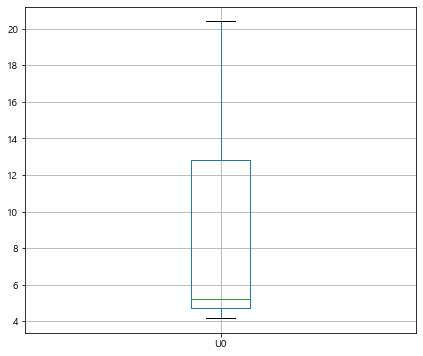

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(7,6))
ym_df_save.boxplot(column=["U0"])
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('U0값_boxplot.png', dpi=100)

In [50]:
ym_df_save.to_csv("../data/buildings/wPerBL_by_ym(U0값추가).csv",encoding="euc-kr")

In [54]:
ym_df_save.sort_values("U0").to_csv("../data/buildings/sorted_U0.csv",encoding="euc-kr",index=False)

In [82]:
ups = ym_df_save[ym_df_save.U0 >= 10]
downs = ym_df_save[ym_df_save.U0 < 10]
ups1 = list(ups.빌딩코드1)
ups2 = list(ups.빌딩코드2)
ups1.append(ups2)
ups_list = list(set(ups2))
downs1 = list(downs.빌딩코드1)
downs2 = list(downs.빌딩코드2)
downs1.append(downs2)
downs_list = list(set(downs2))

In [84]:
len(ups_list)
len(downs_list)

85

In [85]:
all_b = gpd.read_file("../data/buildings/high_bld_over20_include_latlon.shp",encoding="euc-kr")

In [86]:
all_b.head()

ups_shp = all_b.set_index("BD_MGT_SN").loc[ups_list,:]
downs_shp = all_b.set_index("BD_MGT_SN").loc[downs_list,:]

In [87]:
ups_shp.to_file("../data/buildings/ups.shp",encoding="euc-kr")
downs_shp.to_file("../data/buildings/downs.shp",encoding="euc-kr")